In [1]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
from itertools import cycle
import pandas as pd
import numpy as np

In [2]:
sc = StandardScaler()

In [3]:
pip install scikit-learn==0.22.1

Note: you may need to restart the kernel to use updated packages.


In [4]:
training_data_df = pd.read_csv('../csv_files/Music_data_set_binary.csv').drop(['Unnamed: 0',], axis=1)

training_data_df[['mean_mfccs', 'mean_chroma_stft', 'tempo', 'pulse', 'contrast', 'zero_crossing']] = sc.fit_transform(training_data_df[['mean_mfccs', 'mean_chroma_stft', 'tempo', 'pulse', 'contrast', 'zero_crossing']])

In [20]:
y = training_data_df[['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']]
X = training_data_df.drop(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock'], axis=1)

n_classes = y.shape[1]
n_classes

10

In [21]:
# Split into training and test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=100)

x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# Run classifier
classifier = OneVsRestClassifier(svm.LinearSVC(random_state=100))
classifier.fit(x_train, y_train)
y_score = classifier.decision_function(x_test)
(y_score[0,0])


average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.37


In [22]:
# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(),
    y_score.ravel())
average_precision["micro"] = average_precision_score(y_test, y_score,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

Average precision score, micro-averaged over all classes: 0.39


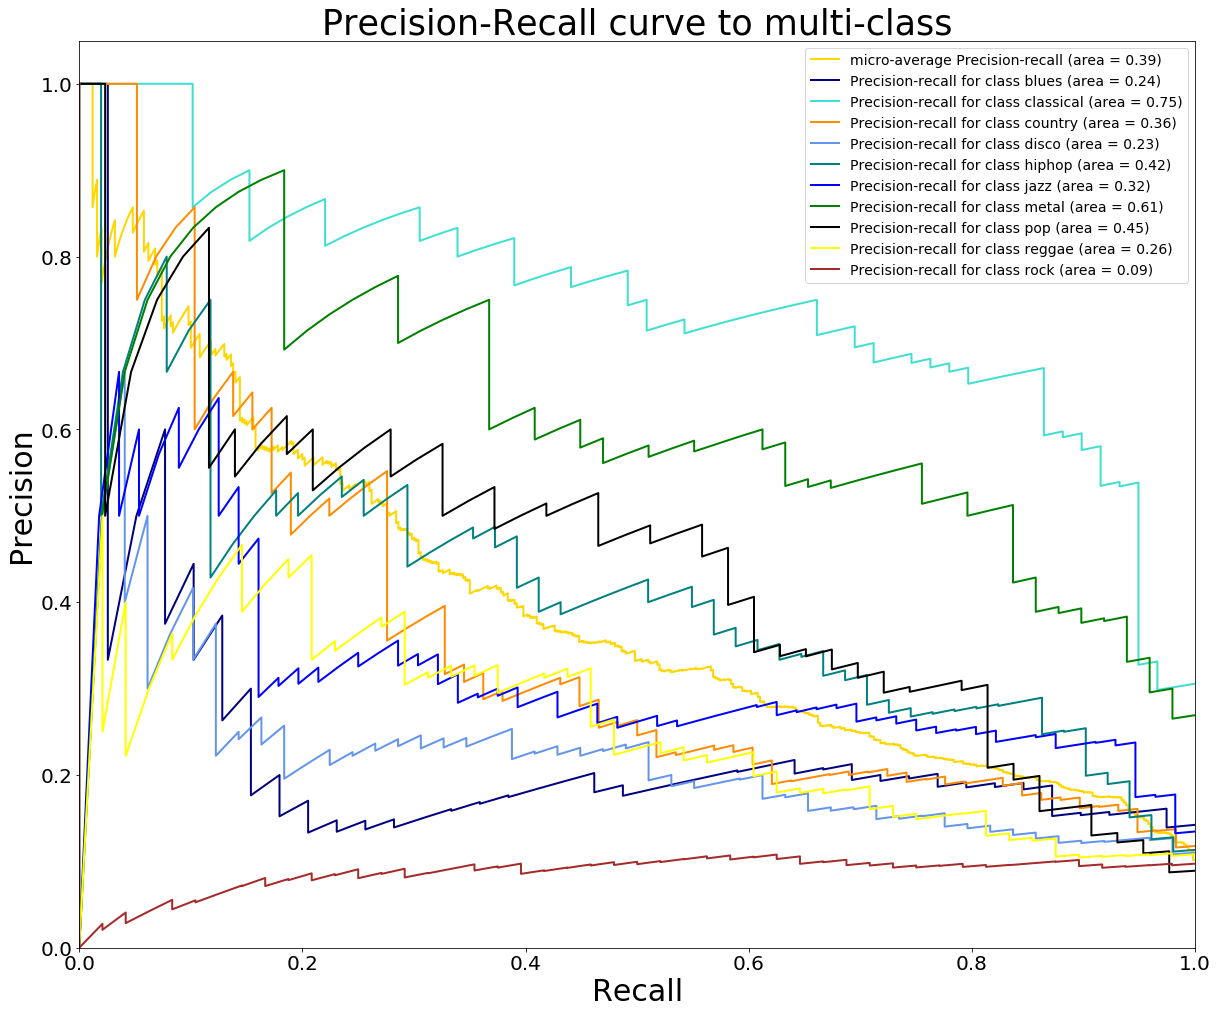

In [23]:
# setup plot details
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal', 'blue', 'green', 'black', 'yellow', 'brown'])
all_genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()

plt.figure(figsize=(20, 20))

lines = []
labels = []

l, = plt.plot(recall["micro"], precision["micro"], color='gold', lw=2)
lines.append(l)
labels.append('micro-average Precision-recall (area = {0:0.2f})'
              ''.format(average_precision["micro"]))

for i, color in zip(range(n_classes), colors):
    l, = plt.plot(recall[i], precision[i], color=color, lw=2)
    lines.append(l)
    labels.append('Precision-recall for class {0} (area = {1:0.2f})'
                  ''.format(all_genres[i], average_precision[i]))


    
fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Recall', fontsize=30)
plt.ylabel('Precision', fontsize=30)
plt.title('Precision-Recall curve to multi-class', fontsize=35)
#plt.rc('font', size=10)
plt.legend(lines, labels, loc='upper right', prop=dict(size=14), fontsize=28)


plt.show()